In [21]:
import os

In [48]:
pwd = os.getcwd()


In [49]:
train_horse_dir = os.path.join(pwd,"temp_for_horse_human","train","horses")
train_human_dir = os.path.join(pwd,"temp_for_horse_human","train","humans")

In [50]:
train_human_dir

'd:\\Umacau\\Deep_learning\\temp_for_horse_human\\train\\humans'

In [52]:
train_horse_names = os.listdir(train_horse_dir)
train_horse_names[:10]

['horse01-0.png',
 'horse01-1.png',
 'horse01-2.png',
 'horse01-3.png',
 'horse01-4.png',
 'horse01-5.png',
 'horse01-6.png',
 'horse01-7.png',
 'horse01-8.png',
 'horse01-9.png']

In [53]:
train_human_names = os.listdir(train_human_dir)
train_human_names[:10]

['human01-00.png',
 'human01-01.png',
 'human01-02.png',
 'human01-03.png',
 'human01-04.png',
 'human01-05.png',
 'human01-06.png',
 'human01-07.png',
 'human01-08.png',
 'human01-09.png']

In [55]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

total training horse images: 500
total training human images: 527


In [59]:
%matplotlib inline

from operator import index
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

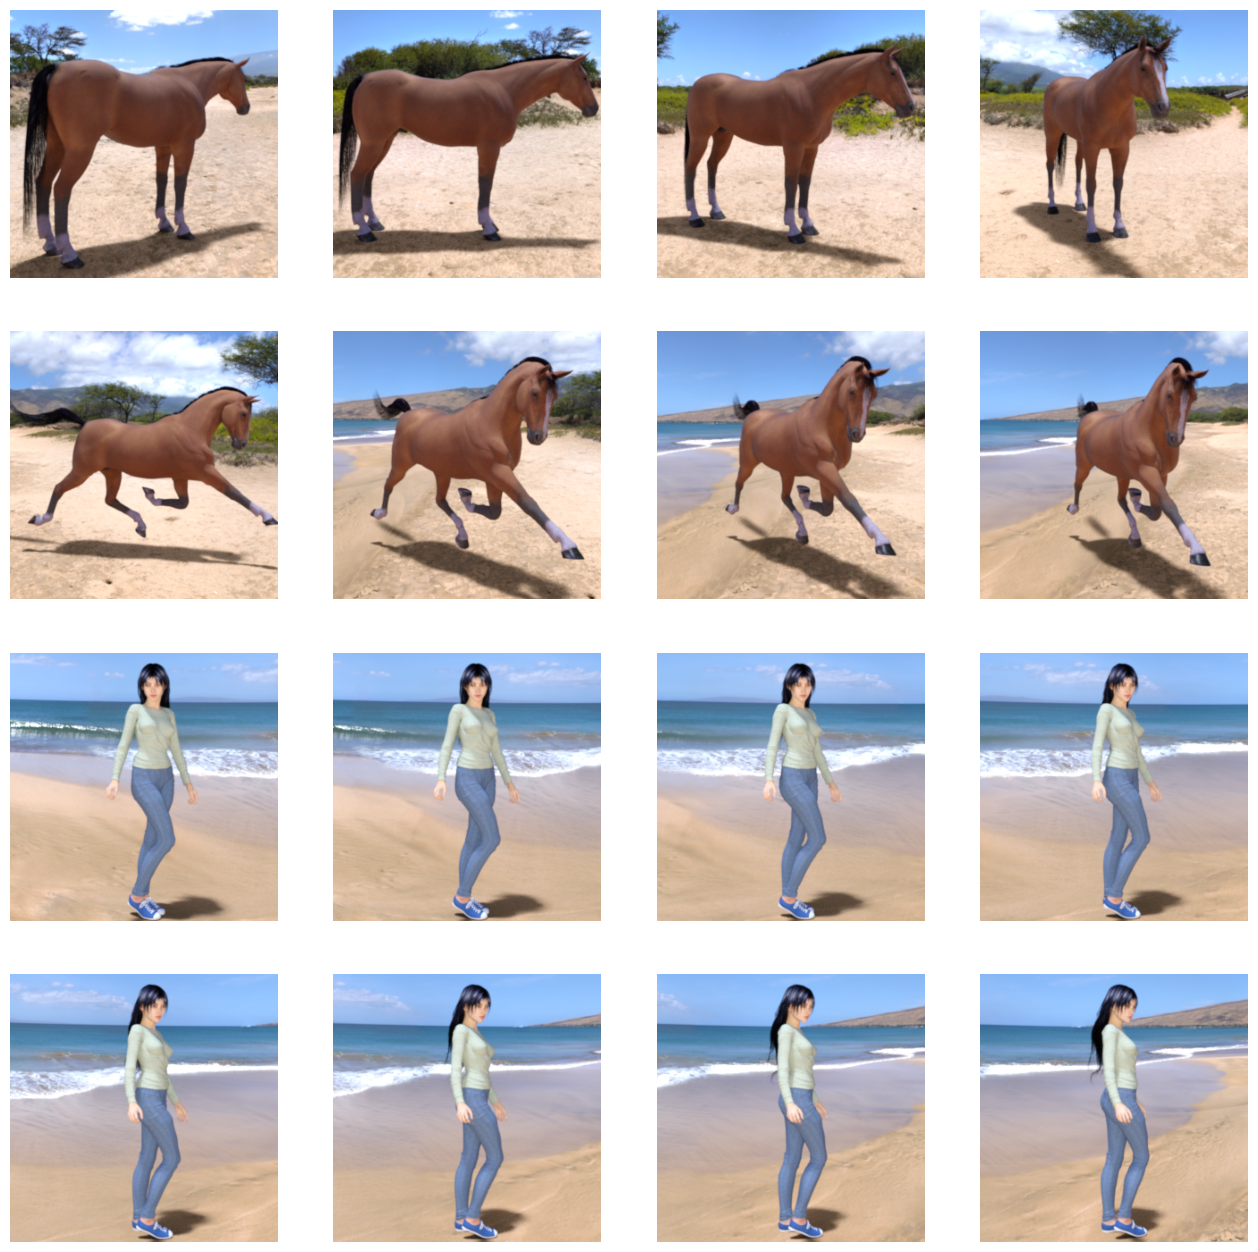

In [62]:
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index += 8
next_horse_pic = [os.path.join(train_horse_dir, fname) 
    for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pic = [os.path.join(train_human_dir, fname) 
    for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pic + next_human_pic):
    sp = plt.subplot(nrows, ncols, i+1)
    sp.axis('off')

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()


In [67]:
import tensorflow as tf

c:\Users\sunqu\miniconda3\envs\tensorflow\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [69]:
model = tf.keras.models.Sequential([
    ###################CNNlayers and max pooling layers################################
    #1
    tf.keras.layers.Conv2D(16,(3,3),activation="relu", input_shape = (150,150,3)),
    tf.keras.layers.MaxPool2D(2,2),
    #2
    tf.keras.layers.Conv2D(32,(3,3),activation="relu"),
    tf.keras.layers.MaxPool2D(2,2),
    #3
    tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
    tf.keras.layers.MaxPool2D(2,2),
    #4
    tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
    tf.keras.layers.MaxPool2D(2,2),
    #5
    tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
    tf.keras.layers.MaxPool2D(2,2),
    # Flatten
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [70]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 17, 17, 64)       0

In [71]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss = "binary_crossentropy", optimizer = RMSprop(lr=0.001), metrics= ['accuracy'])



c:\Users\sunqu\miniconda3\envs\tensorflow\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [73]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255)

In [74]:
train_generator = train_datagen.flow_from_directory(os.path.join(pwd,"temp_for_horse_human","train"),
                                                    target_size = (150,150),
                                                    batch_size = 32,
                                                    class_mode = 'binary')

Found 1027 images belonging to 2 classes.


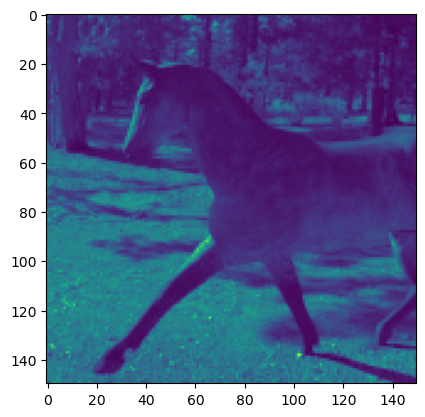

In [87]:
plt.imshow(train_generator[0][0][2,:,:,1])

In [88]:
history = model.fit(
    train_generator,
    steps_per_epoch = 8,
    epochs = 15,
    verbose = 1
)

Epoch 1/15
8/8 [==============================] - 4s 346ms/step - loss: 0.7269 - accuracy: 0.5078
Epoch 2/15
8/8 [==============================] - 2s 278ms/step - loss: 0.5920 - accuracy: 0.8008
Epoch 3/15
8/8 [==============================] - 2s 280ms/step - loss: 0.3724 - accuracy: 0.8750
Epoch 4/15
8/8 [==============================] - 2s 233ms/step - loss: 0.3232 - accuracy: 0.8633
Epoch 5/15
8/8 [==============================] - 2s 194ms/step - loss: 0.3005 - accuracy: 0.8867
Epoch 6/15
8/8 [==============================] - 1s 185ms/step - loss: 0.2222 - accuracy: 0.9219
Epoch 7/15
8/8 [==============================] - 1s 182ms/step - loss: 0.1963 - accuracy: 0.9258
Epoch 8/15
8/8 [==============================] - 2s 240ms/step - loss: 0.1446 - accuracy: 0.9570
Epoch 9/15
8/8 [==============================] - 1s 181ms/step - loss: 0.2890 - accuracy: 0.9297
Epoch 10/15
8/8 [==============================] - 1s 166ms/step - loss: 0.2398 - accuracy: 0.9383
Epoch 11/15
8/8 [==

In [89]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img


In [93]:
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs=model.input, outputs = successive_outputs)
horse_image_files = [os.path.join(train_horse_dir,f) for f in train_horse_names]
human_image_files = [os.path.join(train_human_dir,f) for f in train_human_names]
img_path = random.choice(horse_image_files + human_image_files)

img = load_img(img_path, target_size = (150,150))
x = img_to_array(img)
x= x.reshape((1,)+x.shape)

1/1 [==============================] - 0s 66ms/step


C:\Users\sunqu\AppData\Local\Temp\ipykernel_39136\3049828993.py:43: RuntimeWarning: invalid value encountered in divide
  x /= x.std()


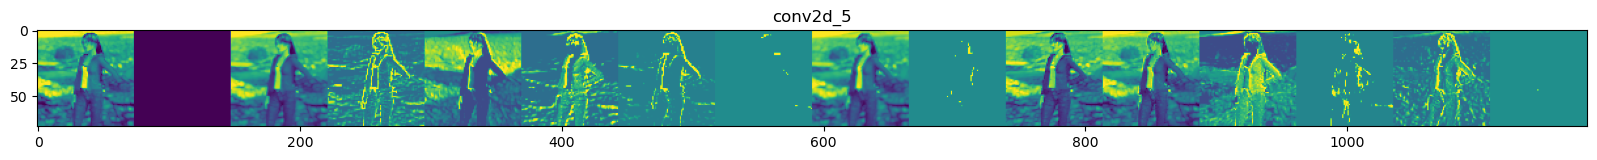

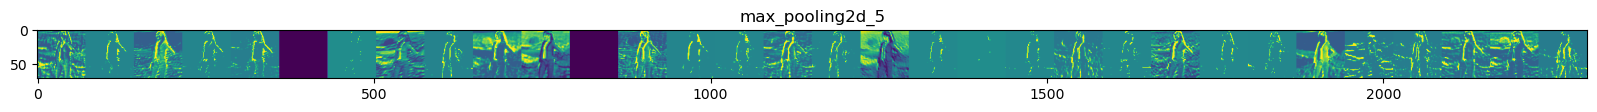

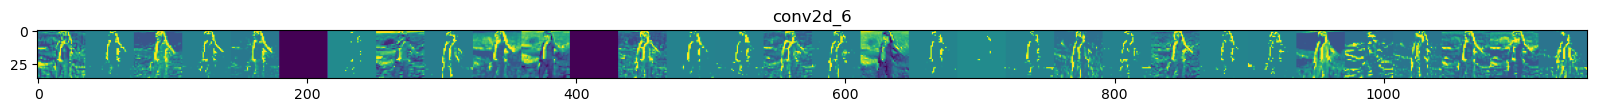

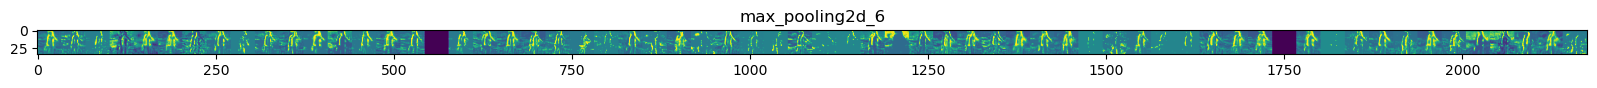

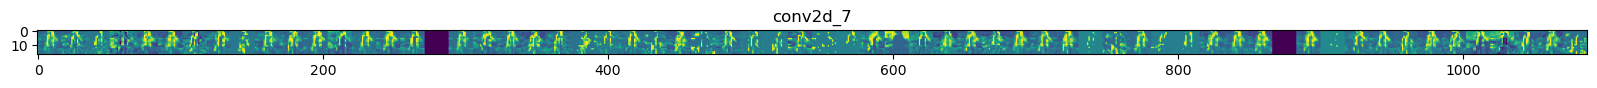

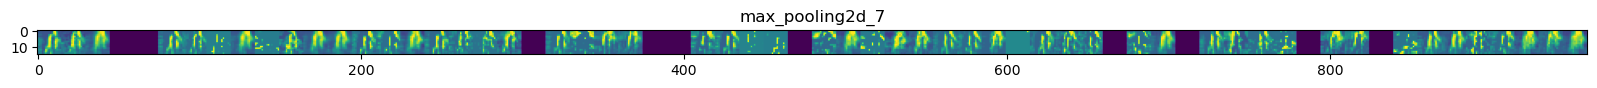

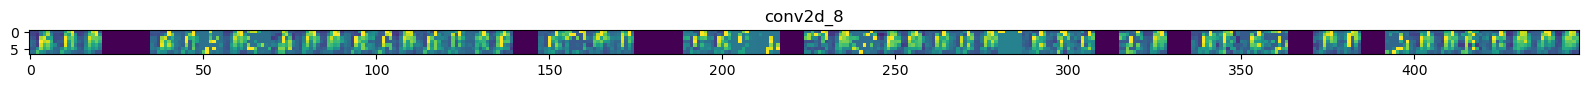

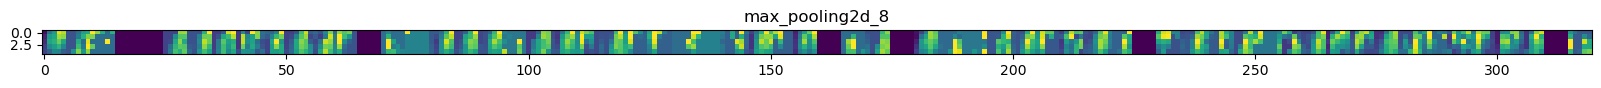

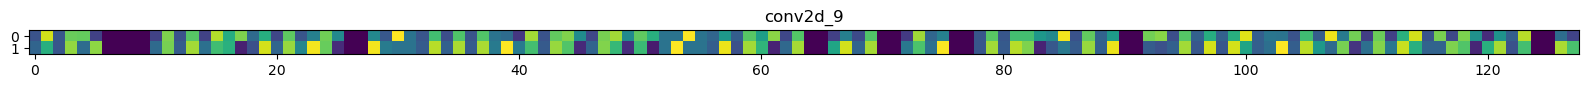

In [97]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')